In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import seaborn as sns

In [17]:
data = pd.read_csv('Model.csv')

,LocationID,Month,Day,Hour,Demand,Duration(mins),Passengercount,Tripdistance(Miles),Amount($),Temperature(F),Windspeed(MPH),Windgust(MPH),Windbearing,Visibility(Miles)
0,48,1,Sunday,14,1,6.00,1.00,1.10,7.30,36.39,7.02,7.51,113.0,10.000
1,48,1,Sunday,17,1,9.00,1.00,2.90,13.80,36.90,7.31,12.03,90.0,10.000
2,48,1,Sunday,18,1,17.00,2.00,1.10,14.30,36.94,8.40,12.55,77.0,10.000
3,48,1,Sunday,19,1,6.00,2.00,1.20,9.35,36.71,9.21,13.45,86.0,8.945
4,48,1,Sunday,21,3,7.67,1.67,1.97,12.30,34.80,10.97,16.27,79.0,2.449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165225,249,12,Tuesday,19,130,12.53,1.56,2.27,16.98,38.87,14.01,27.24,50.0,7.986
165226,249,12,Tuesday,20,154,14.77,1.59,2.57,18.35,38.72,14.61,22.58,42.0,9.568
165227,249,12,Tuesday,21,148,14.26,1.66,2.50,18.13,38.10,12.63,21.41,21.0,9.910
165228,249,12,Tuesday,22,204,14.56,1.75,2.76,18.49,37.75,11.74,17.40,30.0,6.920


In [18]:
data.dropna(inplace = True)
data.drop(['Duration(mins)', 'Passengercount', 'Tripdistance(Miles)', 'Amount($)'], axis = 1, inplace = True)
data

,LocationID,Month,Day,Hour,Demand,Temperature(F),Windspeed(MPH),Windgust(MPH),Windbearing,Visibility(Miles)
0,48,1,Sunday,14,1,36.39,7.02,7.51,113.0,10.000
1,48,1,Sunday,17,1,36.90,7.31,12.03,90.0,10.000
2,48,1,Sunday,18,1,36.94,8.40,12.55,77.0,10.000
3,48,1,Sunday,19,1,36.71,9.21,13.45,86.0,8.945
4,48,1,Sunday,21,3,34.80,10.97,16.27,79.0,2.449
...,...,...,...,...,...,...,...,...,...,...
165225,249,12,Tuesday,19,130,38.87,14.01,27.24,50.0,7.986
165226,249,12,Tuesday,20,154,38.72,14.61,22.58,42.0,9.568
165227,249,12,Tuesday,21,148,38.10,12.63,21.41,21.0,9.910
165228,249,12,Tuesday,22,204,37.75,11.74,17.40,30.0,6.920


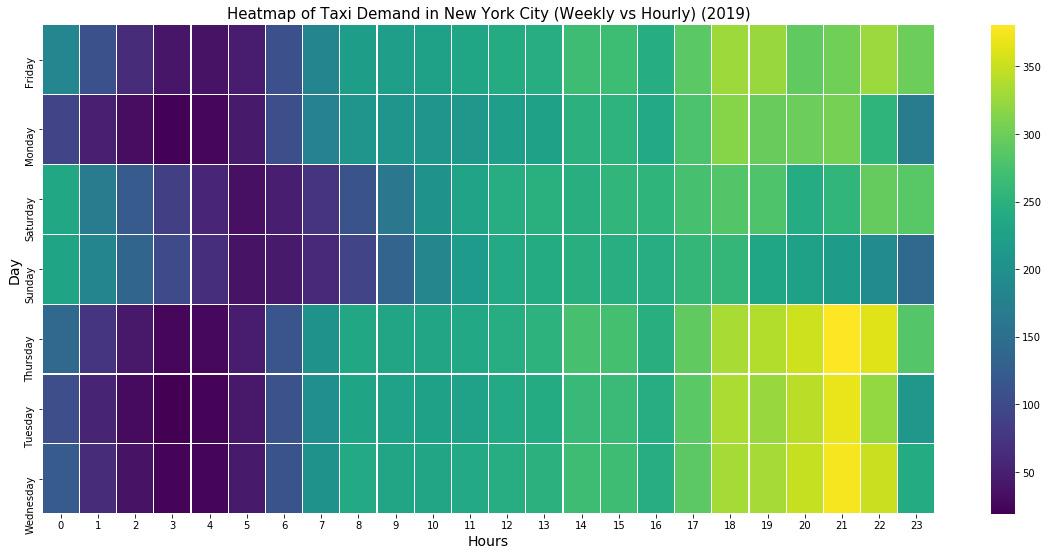

In [25]:
f = data[['Day', 'Hour', 'Demand']]
heatmap = f.groupby(['Day', 'Hour']).agg('mean')
heatmap.reset_index(inplace = True)
heatmap['Demand'] = round(heatmap['Demand'])
plt.figure(figsize = (20, 9))
file_long = heatmap.pivot("Day", "Hour", "Demand")
sns.heatmap(file_long, cmap = 'viridis', annot=False, fmt=".0f", linewidths=0.1)
plt.xlabel('Hours', fontsize = 14)
plt.ylabel('Day', fontsize = 14)
plt.title("Heatmap of Taxi Demand in New York City (Weekly vs Hourly) (2019)", fontsize = 15);
plt.savefig('Heatmap.jpeg')

/Users/praveen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


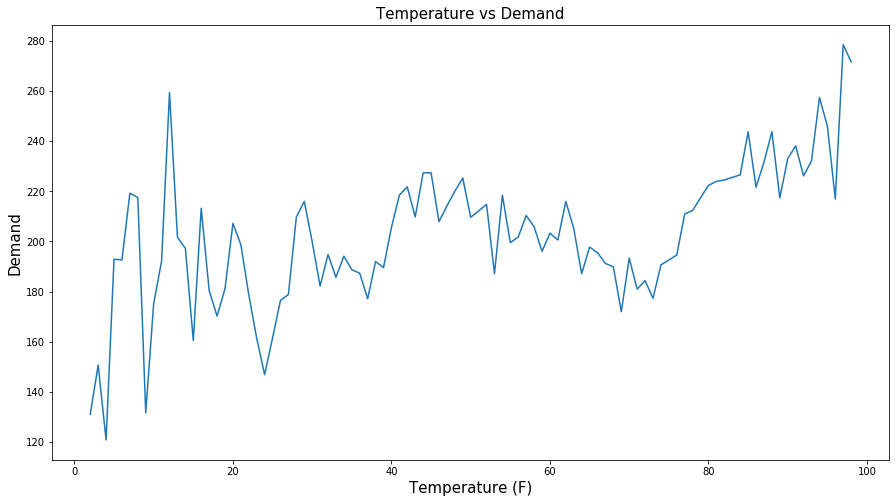

In [26]:
line_plot = data[['Temperature(F)','Demand']]
line_plot['Temperature(F)'] = round(line_plot['Temperature(F)'])
x = line_plot.groupby('Temperature(F)').agg({'Demand':'mean'})
x.reset_index(inplace = True)
plt.figure(figsize=(15,8))
plt.plot(x['Temperature(F)'], x['Demand'],)
plt.title('Temperature vs Demand', fontsize = 15)
plt.xlabel('Temperature (F)', fontsize = 15)
plt.ylabel('Demand', fontsize = 15)
plt.savefig('TempvsDemand.jpeg')

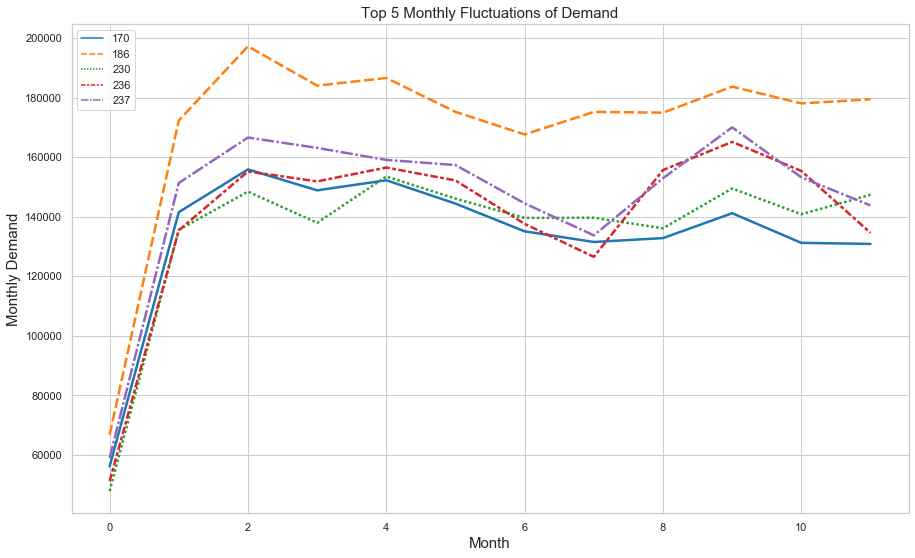

In [103]:
csv_locid = data.groupby(['LocationID']).agg({'Demand':'sum'})
csv_locid.reset_index(inplace=True)
csv_locid.sort_values('Demand',ascending = False, inplace = True)
loc_id = list(csv_locid.LocationID[:5])

csv_months = data.groupby(['LocationID', 'Month']).agg({'Demand':'sum'})
csv_months.reset_index(inplace = True)
csv_months = csv_months[csv_months.LocationID.isin(loc_id)]

df = pd.DataFrame()
for loc in loc_id:
    df[loc] = list(csv_months.loc[csv_months.LocationID== loc, 'Demand'])

# Lineplot
sns.set(style="whitegrid")
data = df
plt.figure(figsize=(15,9))
plt.title('Top 5 Monthly Fluctuations of Demand', fontsize = 15)
sns.lineplot(data=data, palette="tab10", linewidth=2.5);
plt.xlabel('Month', fontsize = 15);
plt.ylabel('Monthly Demand', fontsize = 15);
plt.savefig('Top5.jpeg')